In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.inspection import DecisionBoundaryDisplay # requires sklearn 1.1.3 --> UNABLE TO ACCESS ON COLAB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml

seed = 1234
np.random.seed(seed)  

In [54]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [55]:
# path = "../data/fashion"
# X_train, y_train = load_mnist(path, kind='train')
# X_test, y_test = load_mnist(path, kind='t10k')

x, y = fetch_openml(name="Fashion-MNIST", as_frame=False, return_X_y=True)
X_test, X_train_val, y_test, y_train_val = train_test_split(x, y, test_size=0.8, random_state=seed) # TODO don't shuffle ???
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=seed) # TODO don't shuffle

In [56]:
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [57]:
print("(# of images, # of pixels)")
print(X_train.shape)

(# of images, # of pixels)
(42000, 784)


In [58]:
def configure_to_image(X, n):
    """Configures rows from 0 to n to shapes of square images (e.g. If there are 784 features (pixels), each row will be a 28x28 image)

    Params:
        X: dataset to configure rows to square images
        n: Ending row index to reshape    

    Returns:
        list object containing the configured images 
    """

    dimension = int(X.shape[1] ** (1/2))
    return [np.reshape(X[i], (dimension, dimension)) for i in range(n)]

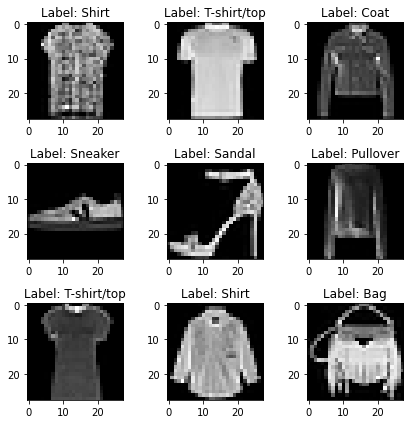

In [59]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
num_plots = 9

images = configure_to_image(X_train, num_plots)

for i in range(num_plots):
    axes[i//3, i%3].imshow(images[i])
    axes[i//3, i%3].set_title("Label: " + labels[int(y_train[i])])

fig.tight_layout()

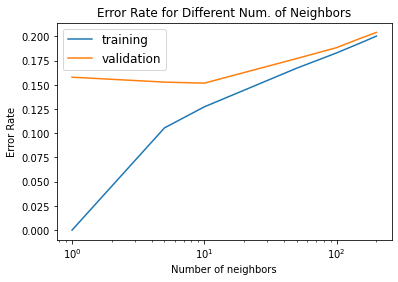

In [60]:
k_hyperparameters = [1, 5, 10, 50, 100, 150, 200]
training_err = list()
validation_err = list()
best_k = float("inf")
min_val_error = 1

for k in k_hyperparameters:
    clf = KNeighborsClassifier(n_neighbors=k)  
    clf.fit(X_train, y_train)   
    y_pred_tr = clf.predict(X_train) 
    y_pred_val = clf.predict(X_valid) 
    tr_err = 1.0 - accuracy_score(y_train, y_pred_tr)
    val_err = 1.0 - accuracy_score(y_valid, y_pred_val)
    training_err.append(tr_err)
    validation_err.append(val_err)

    if min_val_error >= val_err:
        min_val_error = val_err
        best_k = k


plt.semilogx(k_hyperparameters, training_err, label="training")
plt.semilogx(k_hyperparameters, validation_err, label="validation")
plt.title("Error Rate for Different Num. of Neighbors")
plt.ylabel("Error Rate")
plt.xlabel("Number of neighbors")
plt.legend(fontsize=12)

In [64]:
print("The best number of neighbors:", best_k)

The best number of neighbors: 10


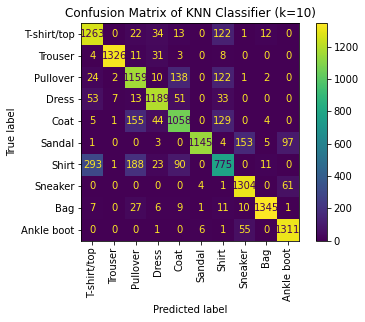

In [61]:
clf = KNeighborsClassifier(n_neighbors=best_k)  
clf.fit(X_train, y_train)   
y_pred_val = clf.predict(X_valid) 
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_val, display_labels=labels.values(), xticks_rotation="vertical")
plt.title("Confusion Matrix of KNN Classifier (k=" + str(best_k) + ")")
plt.show()

Training Sizes: [8400, 16800, 25200, 33600, 42000]


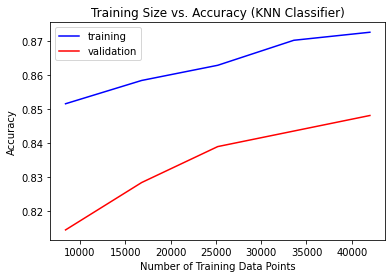

In [62]:
train_accuracy = list()
valid_accuracy = list()
train_size = [8400 * i for i in range(1,6)]
print("Training Sizes:", train_size)

for size in train_size:
    clf = KNeighborsClassifier(n_neighbors=best_k)
    clf.fit(X_train[0:size],y_train[0:size])
    
    y_pred_tr = clf.predict(X_train[0:size])
    y_pred_val = clf.predict(X_valid)
    train_accuracy.append(accuracy_score(y_train[0:size], y_pred_tr))
    valid_accuracy.append(accuracy_score(y_valid, y_pred_val))

plt.title("Training Size vs. Accuracy (KNN Classifier)")
plt.plot(train_size, train_accuracy, "b-", label = "training")
plt.plot(train_size, valid_accuracy, "r", label = "validation")
# plt.semilogx(train_size, train_accuracy, "b-", label = "training")
# plt.semilogx(train_size, valid_accuracy, "r", label = "validation")
plt.xlabel("Number of Training Data Points")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Using the test data (20% of data set aside at beginning)

Accurcy: 0.8485714285714285


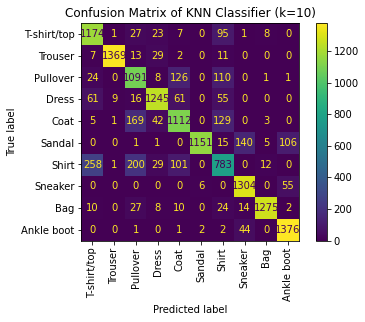

In [63]:
clf = KNeighborsClassifier(n_neighbors=best_k)  
clf.fit(X_train, y_train)   
y_pred_test = clf.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=labels.values(), xticks_rotation="vertical")
plt.title("Confusion Matrix of KNN Classifier (k=" + str(best_k) + ")")
plt.show()

ROC?

In [ ]:
# TODO: Do the ROC/AUC curves